<a href="https://colab.research.google.com/github/Izect/CSST-102-3A/blob/main/3A_TEA%C3%91O_MP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [1]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

Loading

In [4]:
df = pd.read_csv('/content/customer_segmentation (1).csv')


Check 1

In [6]:
df.head(15)

,CustomerID,Age,AnnualIncome,SpendingScore
0,1,22,15000,39
1,2,35,40000,81
2,3,26,30000,77
3,4,40,50000,40
4,5,55,100000,6
5,6,30,35000,77
6,7,50,75000,35
7,8,29,32000,68
8,9,43,45000,53
9,10,36,42000,83


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   CustomerID     20 non-null     int64
 1   Age            20 non-null     int64
 2   AnnualIncome   20 non-null     int64
 3   SpendingScore  20 non-null     int64
dtypes: int64(4)
memory usage: 768.0 bytes


In [8]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,20.00000,20.000000,20.00000,20.000000
mean,10.50000,35.800000,45600.00000,58.500000
std,5.91608,8.538458,19129.47574,22.361857
min,1.00000,22.000000,15000.00000,6.000000
25%,5.75000,29.750000,36500.00000,41.500000
50%,10.50000,35.500000,42500.00000,57.500000
75%,15.25000,40.250000,52750.00000,77.000000
max,20.00000,55.000000,100000.00000,92.000000


In [10]:
wcss = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)

plots

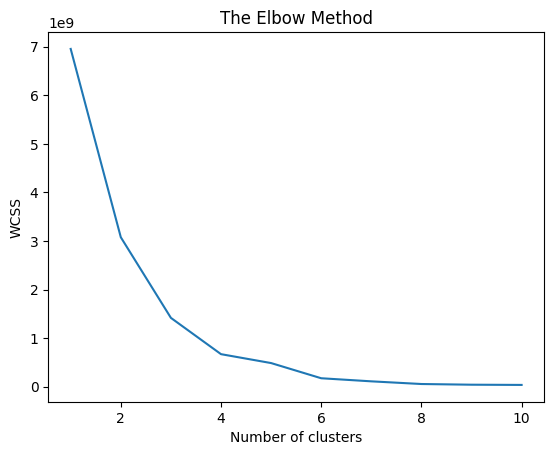

In [11]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

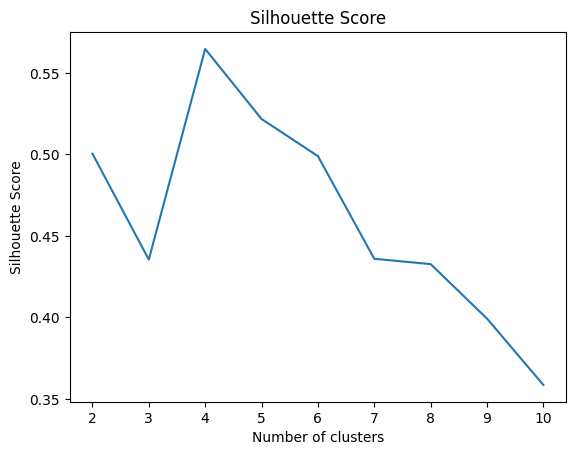

In [13]:
silhouette_scores = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  clusters = kmeans.fit_predict(df)
  silhouette_scores.append(silhouette_score(df, clusters))
  labels = kmeans.fit_predict(df)

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

MODEL EVALUATION

In [14]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(df)

In [15]:
inertia = kmeans.inertia_
silhouette_avg = silhouette_score(df, labels)
print('Inertia:', inertia)
print('Silhouette Score:', silhouette_avg)

Inertia: 486871616.70000005
Silhouette Score: 0.5217684846826642


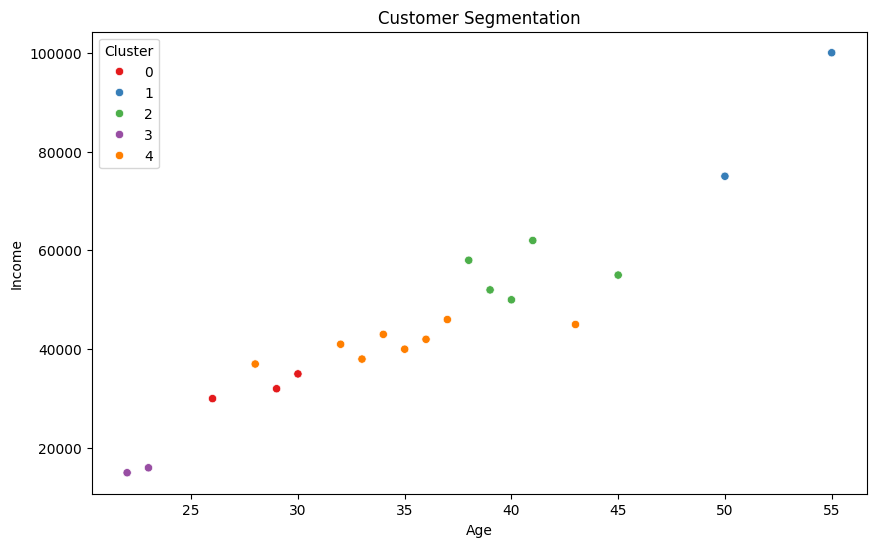

In [21]:
df['Cluster'] = labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Age'], y=df['AnnualIncome'], hue=df['Cluster'], palette='Set1')
plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [25]:
cluster_centers = kmeans.cluster_centers_
cluster_centers_df = pd.DataFrame(cluster_centers, columns=df.columns[:-1])
print(cluster_centers_df)

for i in range(optimal_k):
  cluster_summary = df[df['Cluster'] == 1].describe()
  print(f'Cluster {i + 1} Summary:')
  print(cluster_summary)
  print('\n')

   CustomerID        Age  AnnualIncome  SpendingScore
0    5.666667  28.333333  32333.333333           74.0
1    6.000000  52.500000  87500.000000           20.5
2   13.800000  40.600000  55400.000000           46.4
3    6.000000  22.500000  15500.000000           65.5
4   12.500000  34.750000  41500.000000           68.0
Cluster 1 Summary:
       CustomerID        Age  AnnualIncome  SpendingScore  Cluster
count    2.000000   2.000000       2.00000       2.000000      2.0
mean     6.000000  52.500000   87500.00000      20.500000      1.0
std      1.414214   3.535534   17677.66953      20.506097      0.0
min      5.000000  50.000000   75000.00000       6.000000      1.0
25%      5.500000  51.250000   81250.00000      13.250000      1.0
50%      6.000000  52.500000   87500.00000      20.500000      1.0
75%      6.500000  53.750000   93750.00000      27.750000      1.0
max      7.000000  55.000000  100000.00000      35.000000      1.0


Cluster 2 Summary:
       CustomerID        Age  Ann